# Code

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline

In [25]:
## Reading the image plaksha_Faculty.jpg
image = cv2.imread('plaksha_Faculty.jpg')
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.7  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(image, text, (x, y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f'Total number of face detected are {len(faces_rect)}', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

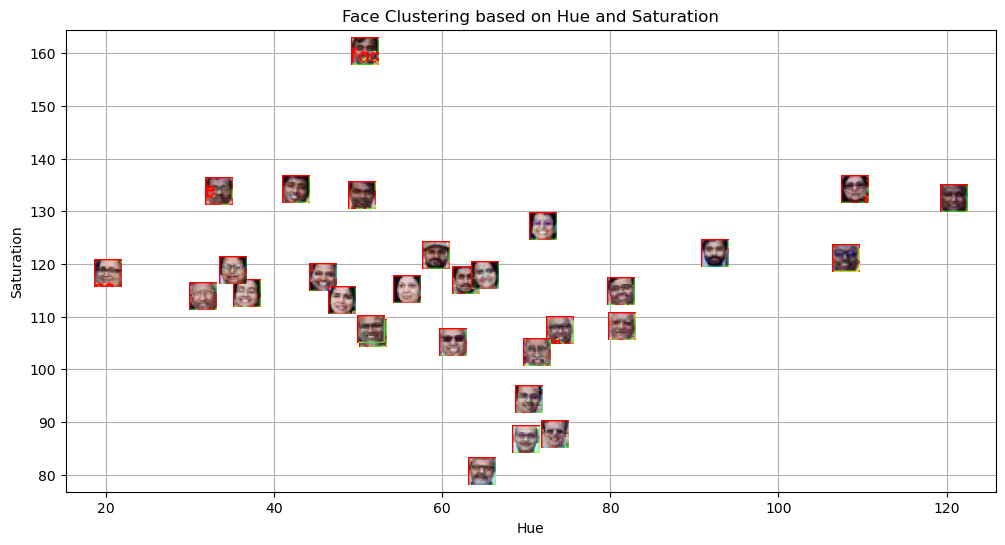

In [ ]:
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    
 ## Put x label
plt.xlabel('Hue')
 ## Put y label
plt.ylabel('Saturation')
 ## Put title
plt.title('Face Clustering based on Hue and Saturation')
 ## Put grid
plt.grid(True)
 ## show the plot
plt.show()

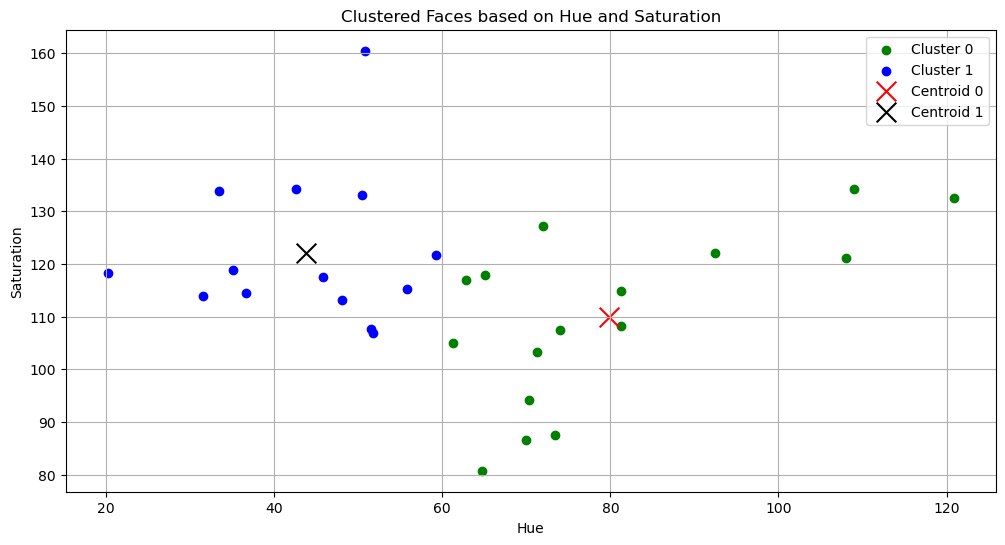

In [9]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], c='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='x', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='x', s=200, label='Centroid 1')

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clustered Faces based on Hue and Saturation")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()

In [15]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
                                               
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY), 1.3, 5)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
    
cv2.imshow("Detected Face in Template", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

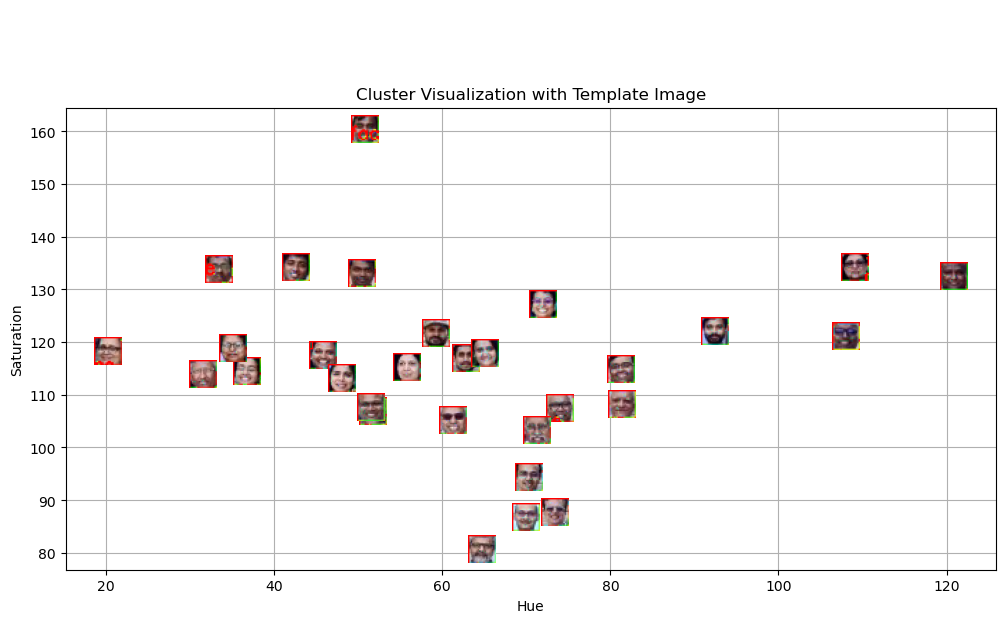

In [18]:
# Convert the template image to HSV color space and store it in template_hsv
template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_img[:,:,0])
template_saturation = np.mean(template_img[:,:,1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Cluster Visualization with Template Image")
## Add grid
plt.grid(True)
## Show the plot
plt.show()

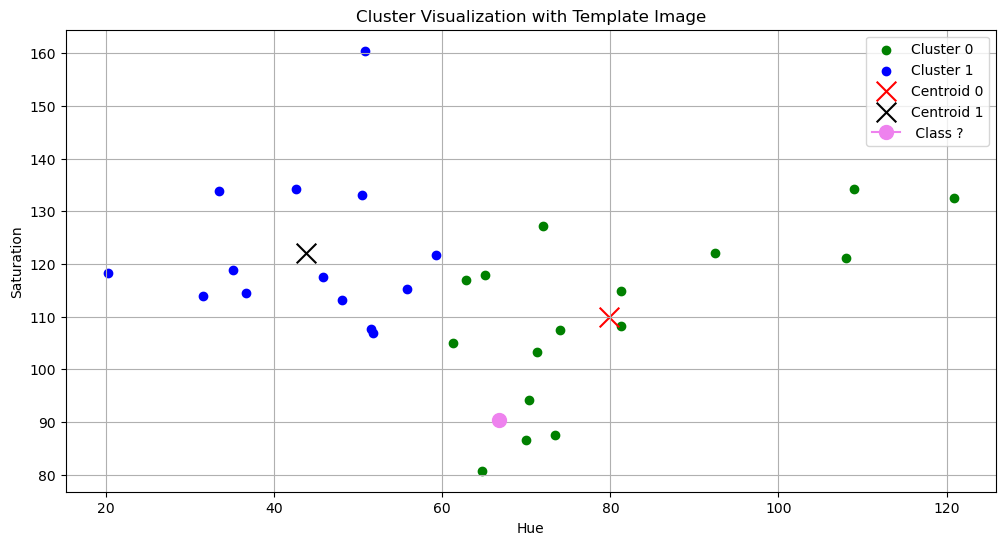

In [17]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='x', s=200, label='Centroid 0')  ## centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='x', s=200, label='Centroid 1') ## centroid 1

plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Cluster Visualization with Template Image")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()

# Report:

### 1. What are the common distance metrics used in distance-based classification algorithms? 
Common distance metrics used in distance-based classification algorithms are:
- Euclidean distance
- Manhattan distance
- Minkowski distance
- Hamming distance
- Cosine distance/similarity

### 2. What are some real-world applications of distance-based classification algorithms? 
Distance-based classification algorithms are used: 
- Medical diagnosis: classifying diseases based on symptoms or patient data
- Image recognition: identifying faces, objects, or patterns in images
- Spam detection: classifying emails as spam or not spam
- Fraud detection: identifying unusual transactions by comparing patterns

### 3. Explain various distance metrics. 
Various distance metrics used in classification are:
- Euclidean distance: the straight-line distance between two points and is the most commonly used metric in algorithms like KNN
- Manhattan distance: measures distance by adding the absolute differences between coordinates
- Minkowski distance: generalised form of Euclidean and Manhattan distance, depends on the value of p, it can represent different distance measures
- Hamming distance: mainly used for categorical or binary data and counts how many positions are different between two data points
- Cosine distance: measures the angle between two vectors instead of actual distance, its commonly used in text analysis and high-dimensional datasets

### 4. What is the role of cross validation in model performance? 
- Cross validation helps evaluate how well the model will perform on unseen data
- dataset is split multiple times into training and testing sets instead of just once
- model will be then trained and tested on different splits and the results are averaged
- helps in checking if the model is overfitting or underfitting
- helps in choosing the best parameters for better performance
- makes the model more reliable and improves generalisation to new data

### 5. Explain variance and bias in terms of KNN? 
- Bias in KNN is to how simple or rigid the model is
- when the value of k is large, the model becomes smoother and makes more general predictions -> high bias, low variance
- high bias can cause underfitting, where the model misses important patterns in the data
- variance refers to how sensitive the model is to small changes in the training data
- when the value of k is very small, the model depends heavily on nearby points -> low bias, high variance
- high variance can cause overfitting, where the model memorises the training data and performs poorly on new data
- so in KNN, choosing the right value of k is important to balance bias and variance for best performanc